# Project: Investigating Fandango Movie Ratings

in 2015, Walt Hickey analyzed movie ratings data and found evidence that Fandango's rating system was biased and dishonest

Fandango normally displays a 0-5 star rating system

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating.

In this project, I'll be analyzing recent movie ratings data to determine if Fandango experienced any changes in rating system.

# I. Understanding the Data

One of the best ways to determine if there were any changes in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis

In [1]:
import pandas as pd

before = pd.read_csv("fandango_score_comparison.csv")
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
after =  pd.read_csv("movie_ratings_16_17.csv")
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
fandango_prior = before[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]].copy()
fandango_prior.head(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [4]:
fandango_after = after[["movie","year","fandango"]]
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

Hickey used the following sampling criteria:
1. The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
2. The movie must have had tickets on sale in 2015.

This sampling is clearly not random because not every movie had the same chance to be included in the sample(like those with under 30 fan reviews or those without tickets on sale in 2015). This sample is unlikely to be representative of the entire population we're interested.

The sampling conditions for our other sample were:
1. The movie must have been released in 2016 or later.
2. The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

# II. Changing the Goal of Our Analysis

Since our samples are not representative of our population, we need to tweak our population of interest and the samples we are currently working with

So let;s examine whether there are any difference in Fandango's ratings for popular movies in 2015 and popular movies in 2016.

# III. Isolating the Samples We Need

Now, we have two populations of interest:
1. Fandango's ratings for popular movies released in 2015.
2. Fandango's ratings for popular movies released in 2016.

Popular movies are categorized as the following: >= 30 fan ratings on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies as we defined them.

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or over.

In [7]:
fandango_after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Now, let's look at Fandango's website to find the fan ratings:
1. Mechanic: Resurrection: 2247
2. Warcraft: 7271
3. Max Steel: 493
4. Me Before You: 5263
5. Fantastic Beasts and Where to Find Them: 13400
6. Cell: 17
7. Genius: 127
8. Sully: 11877
9. A Hologram for the King: 500
10. Captain America: Civil War: 35057

About 90% of the movies in our samples are considered to be popular. 

Now, let's isolate the movies according to years

In [12]:
fandango_prior["Year"] = fandango_prior["FILM"].str[-5:-1]
fandango_prior["Year"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Year, dtype: object

In [13]:
fandango_prior["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

There are movies from 2014. Let's remove them:

In [15]:
fandango_2015 = fandango_prior[fandango_prior["Year"]=="2015"].copy()
fandango_2015["Year"].value_counts()

2015    129
Name: Year, dtype: int64

In [16]:
fandango_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [17]:
fandango_2016 = fandango_after[fandango_after["year"]==2016].copy()
fandango_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

# IV. Comparing Distribution Shapes for 2015 and 2016

([<matplotlib.axis.XTick at 0x7fa3675f1908>,
 <a list of 11 Text xticklabel objects>)

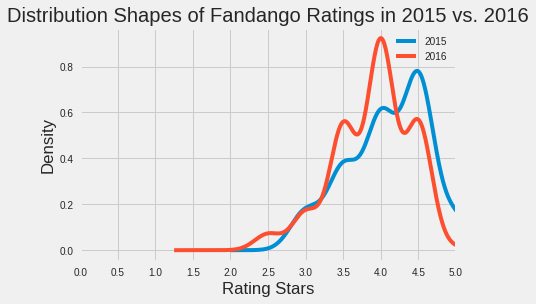

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
%matplotlib inline

plt.style.use("fivethirtyeight")

fandango_2015["Fandango_Stars"].plot.kde(label="2015",legend=True)
fandango_2016["fandango"].plot.kde(label="2016",legend=True)
plt.title("Distribution Shapes of Fandango Ratings in 2015 vs. 2016")
plt.xlabel("Rating Stars")
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))

Both distributions are strongly left skewed, which suggests that movies are rated high on Fandango. Since Fandango sells tickets, the high ratings are a bit suspicious.

The 2016 distribution is slightly shifted to the left. The slight left shift of the 2016 distribution shows that ratings were slightly lower in 2016 compared to 2015. This confirms that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower than in 2015.

# V. Comparing Relative Frequencies Table

This gives us more granular information about the distribution

In [22]:
fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [23]:
fandango_2016["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Observations:
1. In 2016, high ratings of 4.5-5.0 had significantly lower percentages compared to 2015. 
2. In 2016, only half of a percent of movies were given a perfect rating compared to 7% in 2015. 
3. Most popular ratings in 2015 were 4.5, whereas in 2016, most popular ratings were 4.0. 
4. The minimum ratings in 2016 were lower compared to 2015. 

So there are differences between the two frequency distributions

# VI. Determining the Direction of the Change

Let's create a summary statistics table to get a more precise picture about the direction of the difference. 

We can take each distribution of movie ratings and compute its mean, median, and mode to determine what they tell about the direction of the difference. 

In [24]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary_statistics = pd.DataFrame()
summary_statistics['2015'] = [mean_2015, median_2015, mode_2015]
summary_statistics['2016'] = [mean_2016, median_2016, mode_2016]
summary_statistics.index = ['mean', 'median', 'mode']
summary_statistics

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


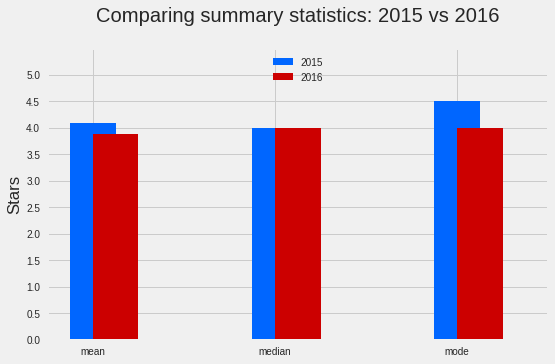

In [32]:
plt.style.use("fivethirtyeight")

summary_statistics["2015"].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary_statistics["2016"].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, 
                                    rot = 0, figsize = (8,5))
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc="upper center")
plt.show()

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we are seeing for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.